####  Importing Libraries 

In [1]:
#import required packages
#basics
import pandas as pd 
import numpy as np

#misc
import gc
import time
import warnings

#stats
#from scipy.misc import imread
from scipy import sparse
import scipy.stats as ss

#viz
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec 
import seaborn as sns
from wordcloud import WordCloud ,STOPWORDS
from PIL import Image
#import matplotlib_venn as venn

#nlp
import string
import re    #for regex
import nltk
from nltk.corpus import stopwords

#import spacy
from nltk import pos_tag
from nltk.stem.wordnet import WordNetLemmatizer 
from nltk.tokenize import word_tokenize

# Tweet tokenizer does not split at apostophes which is what we want
from nltk.tokenize import TweetTokenizer   


#FeatureEngineering
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer, TfidfTransformer
from sklearn.decomposition import TruncatedSVD
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils.validation import check_X_y, check_is_fitted
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm, decomposition, ensemble
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split

#!pip install textblob
import  textblob
import xgboost
import tensorflow as tf
from keras.preprocessing import text, sequence
from keras import layers, models, optimizers

from textblob import TextBlob
from nltk.stem import PorterStemmer
import nltk
#nltk.download('stopwords')
#nltk.download('wordnet')
from textblob import Word 
#nltk.download('punkt')
#nltk.download('averaged_perceptron_tagger')

import spacy
from spacy import displacy
from spacy.matcher import Matcher


#settings
start_time=time.time()
color = sns.color_palette()
sns.set_style("dark")
eng_stopwords = set(stopwords.words("english"))
warnings.filterwarnings("ignore")

lem = WordNetLemmatizer()
tokenizer=TweetTokenizer()

%matplotlib inline

Using TensorFlow backend.


In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [3]:
from sklearn.decomposition import TruncatedSVD,PCA
from sklearn.preprocessing import normalize,Normalizer
from sklearn.pipeline import make_pipeline
from sklearn import metrics
from sklearn.cluster import KMeans 
from sklearn.decomposition import TruncatedSVD,PCA
from sklearn.preprocessing import normalize,Normalizer
from sklearn.pipeline import make_pipeline
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import silhouette_score,pairwise_distances

#### Importing Data

In [4]:
#dataframe job postings
job_post=pd.read_csv('F:/KIRTI/python/6. Analyzing online Job Postings/data job posts.csv')

In [5]:
job_post.head(10)

,jobpost,date,Title,Company,AnnouncementCode,Term,Eligibility,Audience,StartDate,Duration,...,Salary,ApplicationP,OpeningDate,Deadline,Notes,AboutC,Attach,Year,Month,IT
0,AMERIA Investment Consulting Company\nJOB TITL...,"Jan 5, 2004",Chief Financial Officer,AMERIA Investment Consulting Company,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,"To apply for this position, please submit a\nc...",NaN,26 January 2004,NaN,NaN,NaN,2004,1,False
1,International Research & Exchanges Board (IREX...,"Jan 7, 2004",Full-time Community Connections Intern (paid i...,International Research & Exchanges Board (IREX),NaN,NaN,NaN,NaN,NaN,3 months,...,NaN,Please submit a cover letter and resume to:\nI...,NaN,12 January 2004,NaN,The International Research & Exchanges Board (...,NaN,2004,1,False
2,Caucasus Environmental NGO Network (CENN)\nJOB...,"Jan 7, 2004",Country Coordinator,Caucasus Environmental NGO Network (CENN),NaN,NaN,NaN,NaN,NaN,Renewable annual contract\nPOSITION,...,NaN,Please send resume or CV toursula.kazarian@......,NaN,20 January 2004\nSTART DATE: February 2004,NaN,The Caucasus Environmental NGO Network is a\nn...,NaN,2004,1,False
3,Manoff Group\nJOB TITLE: BCC Specialist\nPOSI...,"Jan 7, 2004",BCC Specialist,Manoff Group,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Please send cover letter and resume to Amy\nPe...,NaN,23 January 2004\nSTART DATE: Immediate,NaN,NaN,NaN,2004,1,False
4,Yerevan Brandy Company\nJOB TITLE: Software D...,"Jan 10, 2004",Software Developer,Yerevan Brandy Company,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Successful candidates should submit\n- CV; \n-...,NaN,"20 January 2004, 18:00",NaN,NaN,NaN,2004,1,True
5,"Boutique ""Appollo""\nJOB TITLE: Saleswoman\nPO...","Jan 10, 2004",Saleswoman,"Boutique ""Appollo""",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,"For further information, please contact Irina\...",NaN,01 February 2004,NaN,NaN,NaN,2004,1,False
6,OSI Assistance Foundation - Armenian Branch Of...,"Jan 11, 2004",Chief Accountant/ Finance Assistant,OSI Assistance Foundation - Armenian Branch Of...,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,"For submission of applications/ CVs, please\nc...",NaN,"16 January 2004, 6:00 pm.",NaN,NaN,NaN,2004,1,False
7,International Research & Exchanges Board (IREX...,"Jan 13, 2004",Non-paid part or full time Programmatic Intern,International Research & Exchanges Board (IREX),NaN,NaN,NaN,NaN,NaN,6 months,...,NaN,"To apply, please download and submit the\nappl...",NaN,16 January 2004,NaN,The International Research & Exchanges Board (...,NaN,2004,1,False
8,Yerevan Brandy Company \nJOB TITLE: Assistant...,"Jan 13, 2004",Assistant to Managing Director,Yerevan Brandy Company,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Successful candidates should submit\n- CV; \n-...,NaN,"27 January 2004, 18:00",NaN,NaN,NaN,2004,1,False
9,American Embassy Yerevan\nANNOUNCEMENT NUMBER:...,"Jan 13, 2004","Program Assistant (INL), FSN-8; FP-6*",American Embassy Yerevan\nANNOUNCEMENT NUMBER:...,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Interested candidates for this position should...,NaN,26 January 2004 \nDrafted: GSargsyan\nClear...,NaN,NaN,NaN,2004,1,False


#### Data Exploratory

In [6]:
job_post.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19001 entries, 0 to 19000
Data columns (total 24 columns):
jobpost             19001 non-null object
date                19001 non-null object
Title               18973 non-null object
Company             18994 non-null object
AnnouncementCode    1208 non-null object
Term                7676 non-null object
Eligibility         4930 non-null object
Audience            640 non-null object
StartDate           9675 non-null object
Duration            10798 non-null object
Location            18969 non-null object
JobDescription      15109 non-null object
JobRequirment       16479 non-null object
RequiredQual        18517 non-null object
Salary              9622 non-null object
ApplicationP        18941 non-null object
OpeningDate         18295 non-null object
Deadline            18936 non-null object
Notes               2211 non-null object
AboutC              12470 non-null object
Attach              1559 non-null object
Year              

In [7]:
job_post.columns

Index(['jobpost', 'date', 'Title', 'Company', 'AnnouncementCode', 'Term',
       'Eligibility', 'Audience', 'StartDate', 'Duration', 'Location',
       'JobDescription', 'JobRequirment', 'RequiredQual', 'Salary',
       'ApplicationP', 'OpeningDate', 'Deadline', 'Notes', 'AboutC', 'Attach',
       'Year', 'Month', 'IT'],
      dtype='object')

### Data Selection

In [8]:
# Useful columns from datasets
job_post=job_post[['jobpost', 'Title', 'Company','JobDescription', 'JobRequirment', 'RequiredQual','AboutC','Year', 'Month', 'IT']]

In [9]:
# Treating missing values
job_post[['Title', 'Company','JobDescription', 'JobRequirment', 'RequiredQual','AboutC']]=job_post[['Title', 'Company','JobDescription', 'JobRequirment', 'RequiredQual','AboutC']].fillna(job_post[['Title', 'Company','JobDescription', 'JobRequirment', 'RequiredQual','AboutC']].mode().ix[0])

In [10]:
job_post.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19001 entries, 0 to 19000
Data columns (total 10 columns):
jobpost           19001 non-null object
Title             19001 non-null object
Company           19001 non-null object
JobDescription    19001 non-null object
JobRequirment     19001 non-null object
RequiredQual      19001 non-null object
AboutC            19001 non-null object
Year              19001 non-null int64
Month             19001 non-null int64
IT                19001 non-null bool
dtypes: bool(1), int64(2), object(7)
memory usage: 1.3+ MB


In [11]:
# Number of job posts by titles
classes = job_post['Title'].value_counts()[:21]
keys = classes.keys().to_list()

job_post = job_post[job_post['Title'].isin(keys)]
job_post['Title'].value_counts()

Accountant                                356
Chief Accountant                          219
Medical Representative                    216
Sales Manager                             166
Administrative Assistant                  155
Lawyer                                    151
Software Developer                        134
Project Manager                           117
English Language Courses                  109
Web Developer                             101
Java Developer                             88
Marketing Specialist                       87
Office Manager                             85
Receptionist/ Administrative Assistant     77
System Administrator                       75
Graphic Designer                           75
Marketing Manager                          72
Senior Java Developer                      69
Software Engineer                          69
QA Engineer                                66
PHP Developer                              65
Name: Title, dtype: int64

### Job Posting by Year

In [12]:
y=pd.DataFrame(job_post.Year.value_counts().reset_index())
y['Job Posts']=y.Year
y['Year']=y['index']
y.drop('index',axis=1,inplace=True)
y.sort_values(by='Year',inplace=True)
y

,Year,Job Posts
11,2004,84
10,2005,154
8,2006,178
5,2007,229
4,2008,245
9,2009,163
7,2010,210
6,2011,216
1,2012,274
2,2013,267


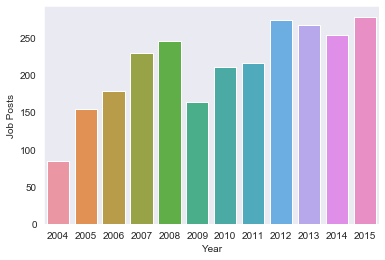

In [13]:
sns.barplot(x='Year',y='Job Posts',data=y)
plt.show()

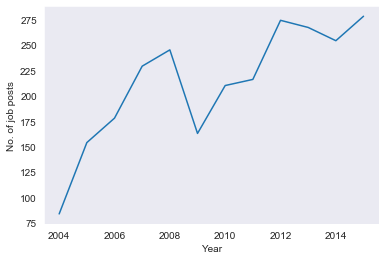

In [14]:
plt.plot('Year','Job Posts',data=y)
plt.xlabel('Year')
plt.ylabel('No. of job posts')
plt.show()

### Job Posting by Month

In [15]:
m=pd.DataFrame(job_post.Month.value_counts().reset_index())
m['Job Posts']=m.Month
m['Month']=m['index']
m.drop('index',axis=1,inplace=True)
m.sort_values(by='Month',inplace=True)
m

,Month,Job Posts
9,1,201
0,2,232
1,3,231
10,4,201
7,5,209
6,6,210
4,7,212
5,8,211
2,9,229
3,10,225


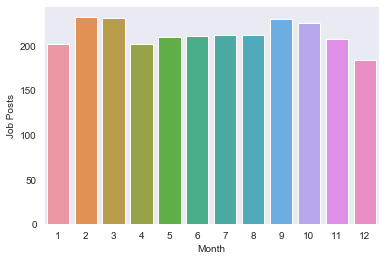

In [16]:
sns.barplot(x='Month',y='Job Posts',data=m)
plt.show()

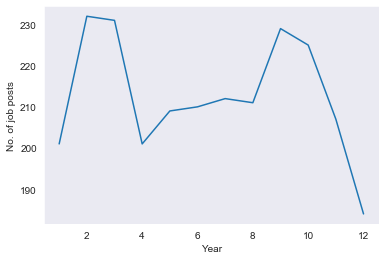

In [17]:
plt.plot('Month','Job Posts',data=m)
plt.xlabel('Year')
plt.ylabel('No. of job posts')
plt.show()

### Top job posts every Year(2004-2015)

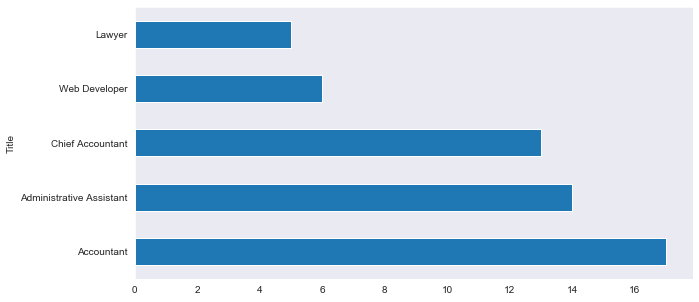

In [18]:
#2004
yr_1=job_post[job_post.Year==2004].groupby('Title').count().sort_values('jobpost',ascending=False).head(5)
plt.figure(figsize=(10, 5))
yr_1.jobpost.plot('barh')
plt.show()

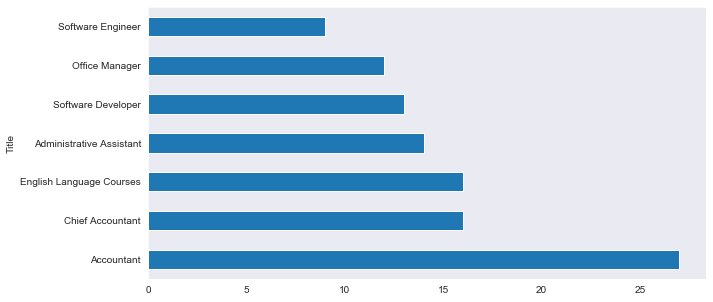

In [19]:
#2005
yr_2=job_post[job_post.Year==2005].groupby('Title').count().sort_values('jobpost',ascending=False).head(7)
plt.figure(figsize=(10, 5))
yr_2.jobpost.plot('barh')
plt.show()

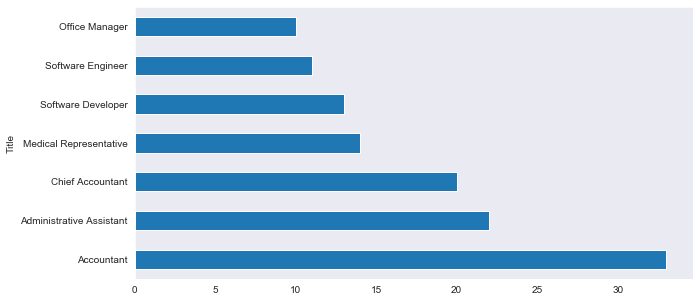

In [20]:
# 2006
yr_3=job_post[job_post.Year==2006].groupby('Title').count().sort_values('jobpost',ascending=False).head(7)
plt.figure(figsize=(10, 5))
yr_3.jobpost.plot('barh')
plt.show()

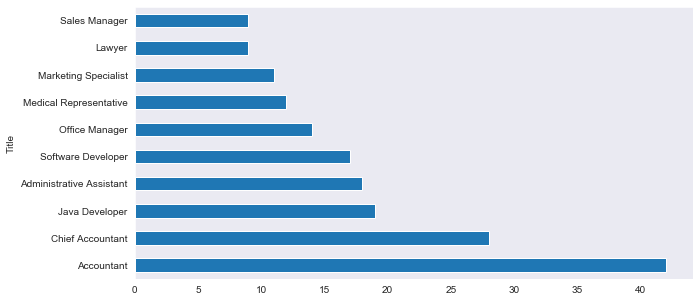

In [21]:
# 2007
yr_4=job_post[job_post.Year==2007].groupby('Title').count().sort_values('jobpost',ascending=False).head(10)
plt.figure(figsize=(10, 5))
yr_4.jobpost.plot('barh')
plt.show()

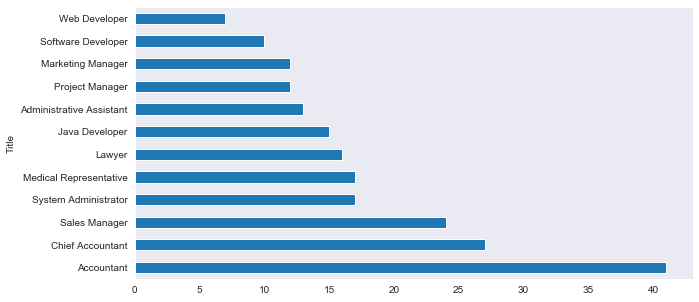

In [22]:
# 2008
yr_5=job_post[job_post.Year==2008].groupby('Title').count().sort_values('jobpost',ascending=False).head(12)
plt.figure(figsize=(10, 5))
yr_5.jobpost.plot('barh')
plt.show()

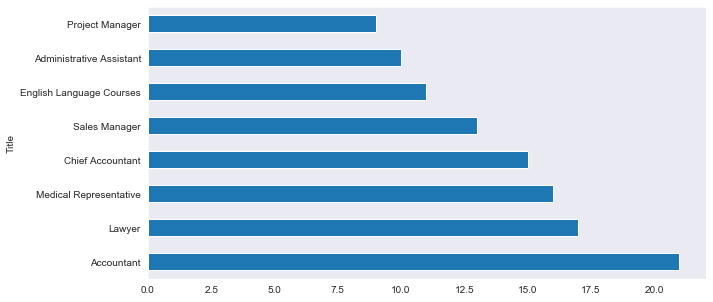

In [23]:
# 2009
yr_6=job_post[job_post.Year==2009].groupby('Title').count().sort_values('jobpost',ascending=False).head(8)
plt.figure(figsize=(10, 5))
yr_6.jobpost.plot('barh')
plt.show()

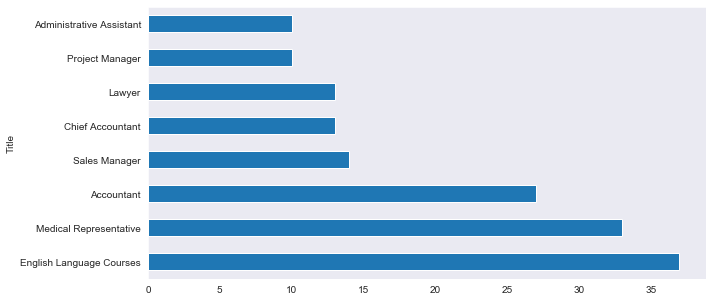

In [24]:
# 2010
yr_7=job_post[job_post.Year==2010].groupby('Title').count().sort_values('jobpost',ascending=False).head(8)
plt.figure(figsize=(10, 5))
yr_7.jobpost.plot('barh')
plt.show()

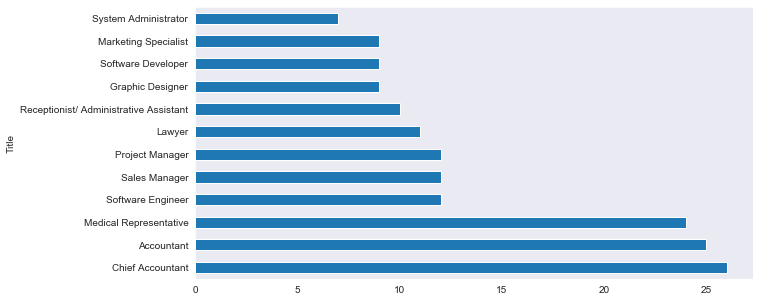

In [25]:
# 2011
yr_8=job_post[job_post.Year==2011].groupby('Title').count().sort_values('jobpost',ascending=False).head(12)
plt.figure(figsize=(10, 5))
yr_8.jobpost.plot('barh')
plt.show()

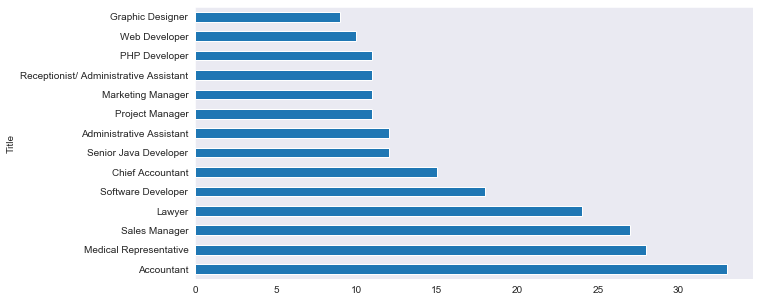

In [26]:
# 2012
yr_9=job_post[job_post.Year==2012].groupby('Title').count().sort_values('jobpost',ascending=False).head(14)
plt.figure(figsize=(10, 5))
yr_9.jobpost.plot('barh')
plt.show()

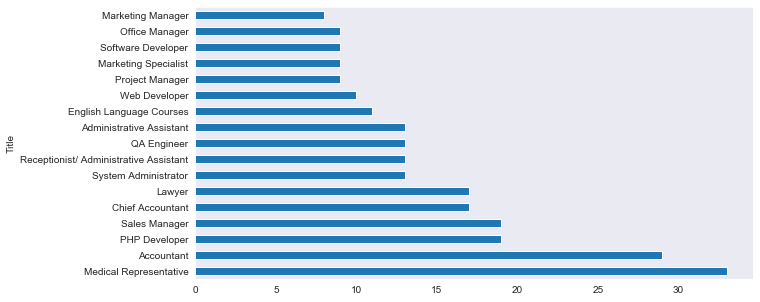

In [27]:
# 2013
yr_10=job_post[job_post.Year==2013].groupby('Title').count().sort_values('jobpost',ascending=False).head(17)
plt.figure(figsize=(10, 5))
yr_10.jobpost.plot('barh')
plt.show()

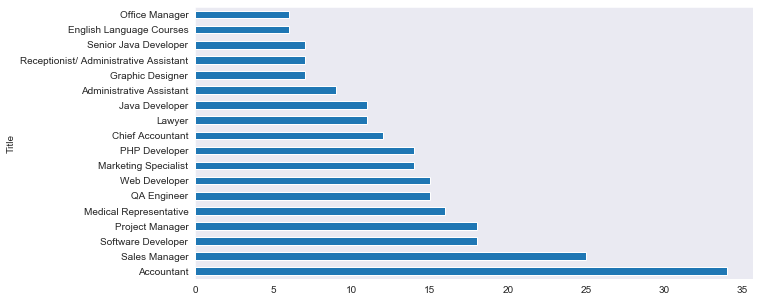

In [28]:
# 2014
yr_11=job_post[job_post.Year==2014].groupby('Title').count().sort_values('jobpost',ascending=False).head(18)
plt.figure(figsize=(10, 5))
yr_11.jobpost.plot('barh')
plt.show()

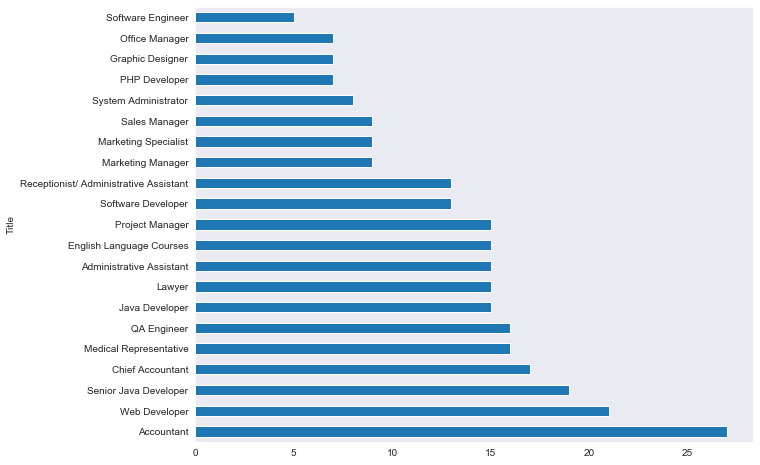

In [29]:
# 2015
yr_12=job_post[job_post.Year==2015].groupby('Title').count().sort_values('jobpost',ascending=False).head(22)
plt.figure(figsize=(10, 8))
yr_12.jobpost.plot('barh')
plt.show()

### Job Post by Company

In [30]:
c=pd.DataFrame(job_post.Company.value_counts().reset_index())
c['Job Posts']=c.Company
c['Company']=c['index']
c.drop('index',axis=1,inplace=True)
c.sort_values(by='Job Posts',inplace=True,ascending=False)
c.head(10)

,Company,Job Posts
0,Career Center NGO,178
1,SAS Group LLC,25
2,Virtual Solution Global Services LLC,23
3,ArmenTel CJSC,23
4,Boomerang Software LLC,21
5,IUNetworks LLC,17
6,Joomag AM LLC,15
7,Sourcio CJSC,14
8,BetArchitect LLC,14
9,"EPAM Systems, Inc.",14


In [31]:
y=pd.DataFrame(job_post.Year.value_counts().reset_index())
y['Title']=y.Year
y['Year']=y['index']
y.drop('index',axis=1,inplace=True)
y.sort_values(by='Year',inplace=True)
y

,Year,Title
11,2004,84
10,2005,154
8,2006,178
5,2007,229
4,2008,245
9,2009,163
7,2010,210
6,2011,216
1,2012,274
2,2013,267


### Supervised Learning

In [32]:
df=job_post[['RequiredQual','IT']]

### Basic Exploratory Analysis

In [34]:
df['RequiredQual'] = df['RequiredQual'].astype(str)

pos_family = {
    'noun' : ['NN','NNS','NNP','NNPS'],
    'pron' : ['PRP','PRP$','WP','WP$'],
    'verb' : ['VB','VBD','VBG','VBN','VBP','VBZ'],
    'adj' :  ['JJ','JJR','JJS'],
    'adv' : ['RB','RBR','RBS','WRB']
}

# function to check and get the part of speech tag count of a words in a given sentence
def check_pos_tag(x, flag):
    cnt = 0
    try:
        wiki = textblob.TextBlob(x)
        for tup in wiki.tags:
            ppo = list(tup)[1]
            if ppo in pos_family[flag]:
                cnt += 1
    except:
        pass
    return cnt

df['noun_count'] = df['RequiredQual'].apply(lambda x: check_pos_tag(x, 'noun'))
df['verb_count'] = df['RequiredQual'].apply(lambda x: check_pos_tag(x, 'verb'))
df['adj_count']  = df['RequiredQual'].apply(lambda x: check_pos_tag(x, 'adj'))
df['adv_count']  = df['RequiredQual'].apply(lambda x: check_pos_tag(x, 'adv'))
df['pron_count'] = df['RequiredQual'].apply(lambda x: check_pos_tag(x, 'pron')) 


### Calculating Sentiment analysis using Textblob module

In [35]:
df['sentiment'] = df["RequiredQual"].apply(lambda x: TextBlob(x).sentiment.polarity )

In [37]:
df.IT.value_counts()

False    1951
True      601
Name: IT, dtype: int64

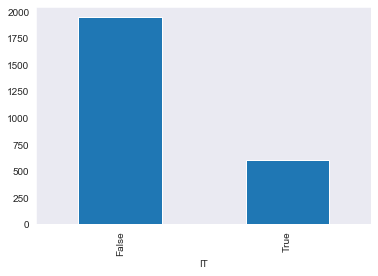

In [38]:
df.groupby('IT')['RequiredQual'].count().plot('bar')
plt.show()

In [39]:
# convert label to a numeric variable
df['IT'] = np.where(df.IT==False,0,1)

In [42]:
#df.to_excel('df.xlsx')

### Split the data into train & Test

In [43]:
# train features and labels 
y = df['IT']
X = df['RequiredQual']

# split the new DataFrame into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.15, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2169,)
(383,)
(2169,)
(383,)


### Creating user defined functions for clean the text and pre-process the data

In [44]:
#Abbrevations and Words correction
def clean_text(text):
    text = text.lower()
    text = text.strip()
    text = re.sub(r' +', ' ', text)
    text = re.sub(r"[-()\"#/@;:{}`+=~|.!?,'0-9]", "", text)
    return(text)

In [45]:
stop = set(nltk.corpus.stopwords.words('english'))

In [46]:
import string
def pre_process(text):
    #text = text.str.replace('/','')                           #Replacing the / with none
    text = text.apply(lambda x: re.sub("  "," ", x))          #Replacing double space with single space
    #text=re.sub(r'!"#$%&()*,-./:;<=>?@\[]^_`{|}~','', text)     #Replacing special character with none
    #text = re.sub(r'[0-9]+', '', text)                        #Replacing numbers with none
    text = text.apply(lambda x: " ".join(x.translate(str.maketrans('', '', string.punctuation)) for x in x.split() if x.isalpha()))
    text = text.apply(lambda x: " ".join(x for x in x.split() if x not in stop)) #Removing stop words
    text = text.apply(lambda x: str(TextBlob(x).correct()))                      #Correct spelling corrections
    #text = text.apply(lambda x: " ".join(PorterStemmer().stem(word) for word in x.split())) #Stemming using porter stemmer
   # text = text.apply(lambda x: " ".join(stemmer_func(word) for word in x.split()))        #Stemming
    text = text.apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))   #lemmatization
   # text = text.apply(lambda x: " ".join(word for word, pos in pos_tag(x.split()) if pos not in ['NN','NNS','NNP','NNPS'])) #Removing nouns etc
    return(text)

In [47]:
X_train = X_train.apply(lambda x: clean_text(x))
X_test = X_test.apply(lambda x: clean_text(x))

In [48]:
X_train=pre_process(X_train)
X_test =pre_process(X_test)

### Vectorization (count, tfidf) for both train & test

In [49]:
#Train
count_vect = CountVectorizer(analyzer='word', 
                             token_pattern=r'\w{1,}', 
                             ngram_range=(2, 3),  
                             encoding='latin-1',
                             max_df=0.9,min_df=0.001)
xtrain_count = count_vect.fit_transform(X_train)

tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(xtrain_count)

#Test
#count_vect = CountVectorizer()
xtest_count = count_vect.transform(X_test)

#tfidf_transformer = TfidfTransformer()
X_test_tfidf = tfidf_transformer.transform(xtest_count)

In [50]:
xtrain_count

<2169x14019 sparse matrix of type '<class 'numpy.int64'>'
	with 140384 stored elements in Compressed Sparse Row format>

### View the document term metrics

In [51]:
dtm2=pd.DataFrame(X_train_tfidf.toarray(), columns=count_vect.get_feature_names())

In [52]:
dtm2.head(10)

,a engineer,a engineer experience,a engineer role,a engineer software,a process,a process methodology,a role,a role ideally,a self,a self process,...,year successful formal,year supervisor,year supervisor responsibility,year upper,year upper management,year work,year work experience,year work least,year working,year working experience
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [53]:
# ngram level tf-idf 
tfidf_vect_ngram = TfidfVectorizer(analyzer='word', token_pattern='\w{1,}', ngram_range=(2, 3),max_df=0.9,min_df=0.001)
tfidf_vect_ngram.fit(df['RequiredQual'])
xtrain_tfidf_ngram =  tfidf_vect_ngram.transform(X_train)
xtest_tfidf_ngram =  tfidf_vect_ngram.transform(X_test)

In [54]:
# characters level tf-idf
tfidf_vect_ngram_chars = TfidfVectorizer(analyzer='char', token_pattern='\w{1,}', ngram_range=(2,3), max_df=0.9,min_df=0.001)
tfidf_vect_ngram_chars.fit(df['RequiredQual'])
xtrain_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(X_train) 
xtest_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(X_test)

### Topic Modeling

In [55]:
# train a LDA Model
lda_model = decomposition.LatentDirichletAllocation(n_components=15, learning_method='batch', max_iter=50)
X_topics = lda_model.fit_transform(X_train_tfidf)
topic_word = lda_model.components_ 
vocab = count_vect.get_feature_names()

In [56]:
# view the topic models
n_top_words = 10
topic_summaries = []
for i, topic_dist in enumerate(topic_word):
    topic_words = np.array(vocab)[np.argsort(topic_dist)][:-(n_top_words+1):-1]
    topic_summaries.append(' '.join(topic_words))

topic_summaries

['computer science degree computer degree computer science quality assurance year experience least year experience testing tool software development bachelor degree computer science related',
 'medical representative experience medical experience medical representative work experience medical communication interpersonal skill software development communication interpersonal development cycle cycle ability development cycle ability',
 'university degree medicine degree medicine medicine pharmacy degree medicine pharmacy would advantage fleecy russian experience pharmaceutical fleecy russian language language knowledge english pharmaceutical industry',
 'knowledge work knowledge work experience experience all html all html i experience all all html experience data degree equivalent work independently deadline good',
 'education least education least year medical pharmaceutical expel powerpoint medical pharmaceutical education pharmaceutical education higher medical pharmaceutical word ex

##### Topics:
            1.communication skills
            2.languages knowledge
            3.Software development
            4.sales marketing
            5.medical pharamcy knowledge
            6.Finance accounting
            7.microsoft office,html,adobe photoshop knowledge

### Online Job Data-Word Clouds

In [151]:
frequency_words_wo_stop= {}
for data in df['RequiredQual']:
    tokens = nltk.wordpunct_tokenize(data.lower())
    for token in tokens:
        if token.lower() not in stop:
            if token in frequency_words_wo_stop:
                count = frequency_words_wo_stop[token]
                count = count + 1
                frequency_words_wo_stop[token] = count
            else:
                frequency_words_wo_stop[token] = 1

In [152]:
frequency_words_wo_stop

{'-': 22623,
 'university': 794,
 'degree': 1410,
 ';': 17205,
 'economical': 6,
 'background': 126,
 'plus': 1352,
 'excellent': 2131,
 'knowledge': 5513,
 'windows': 181,
 '2000': 14,
 'server': 303,
 ',': 10113,
 'networking': 69,
 'tcp': 26,
 '/': 1436,
 'ip': 40,
 'technologies': 327,
 'ms': 915,
 'sql': 337,
 'visual': 34,
 'basic': 349,
 '6': 25,
 'least': 1187,
 '2': 569,
 'years': 1466,
 'experience': 3980,
 'database': 202,
 'software': 879,
 'development': 756,
 'good': 2047,
 'english': 2123,
 '.': 3248,
 'remuneration': 3,
 ':': 716,
 'commensurate': 5,
 'norms': 14,
 'accepted': 39,
 'company': 134,
 'gd': 1,
 'creative': 119,
 'innovative': 24,
 'great': 11,
 'capacity': 37,
 'implement': 19,
 'stylish': 1,
 'ideas': 32,
 'open': 242,
 'new': 116,
 'trends': 5,
 'fine': 5,
 'arts': 5,
 'extensive': 48,
 'graphic': 69,
 'design': 376,
 'marketing': 381,
 'communications': 79,
 'tools': 218,
 'required': 80,
 'well': 288,
 'thorough': 34,
 'adobe': 130,
 'photoshop': 111,


In [153]:
from wordcloud import WordCloud ,STOPWORDS

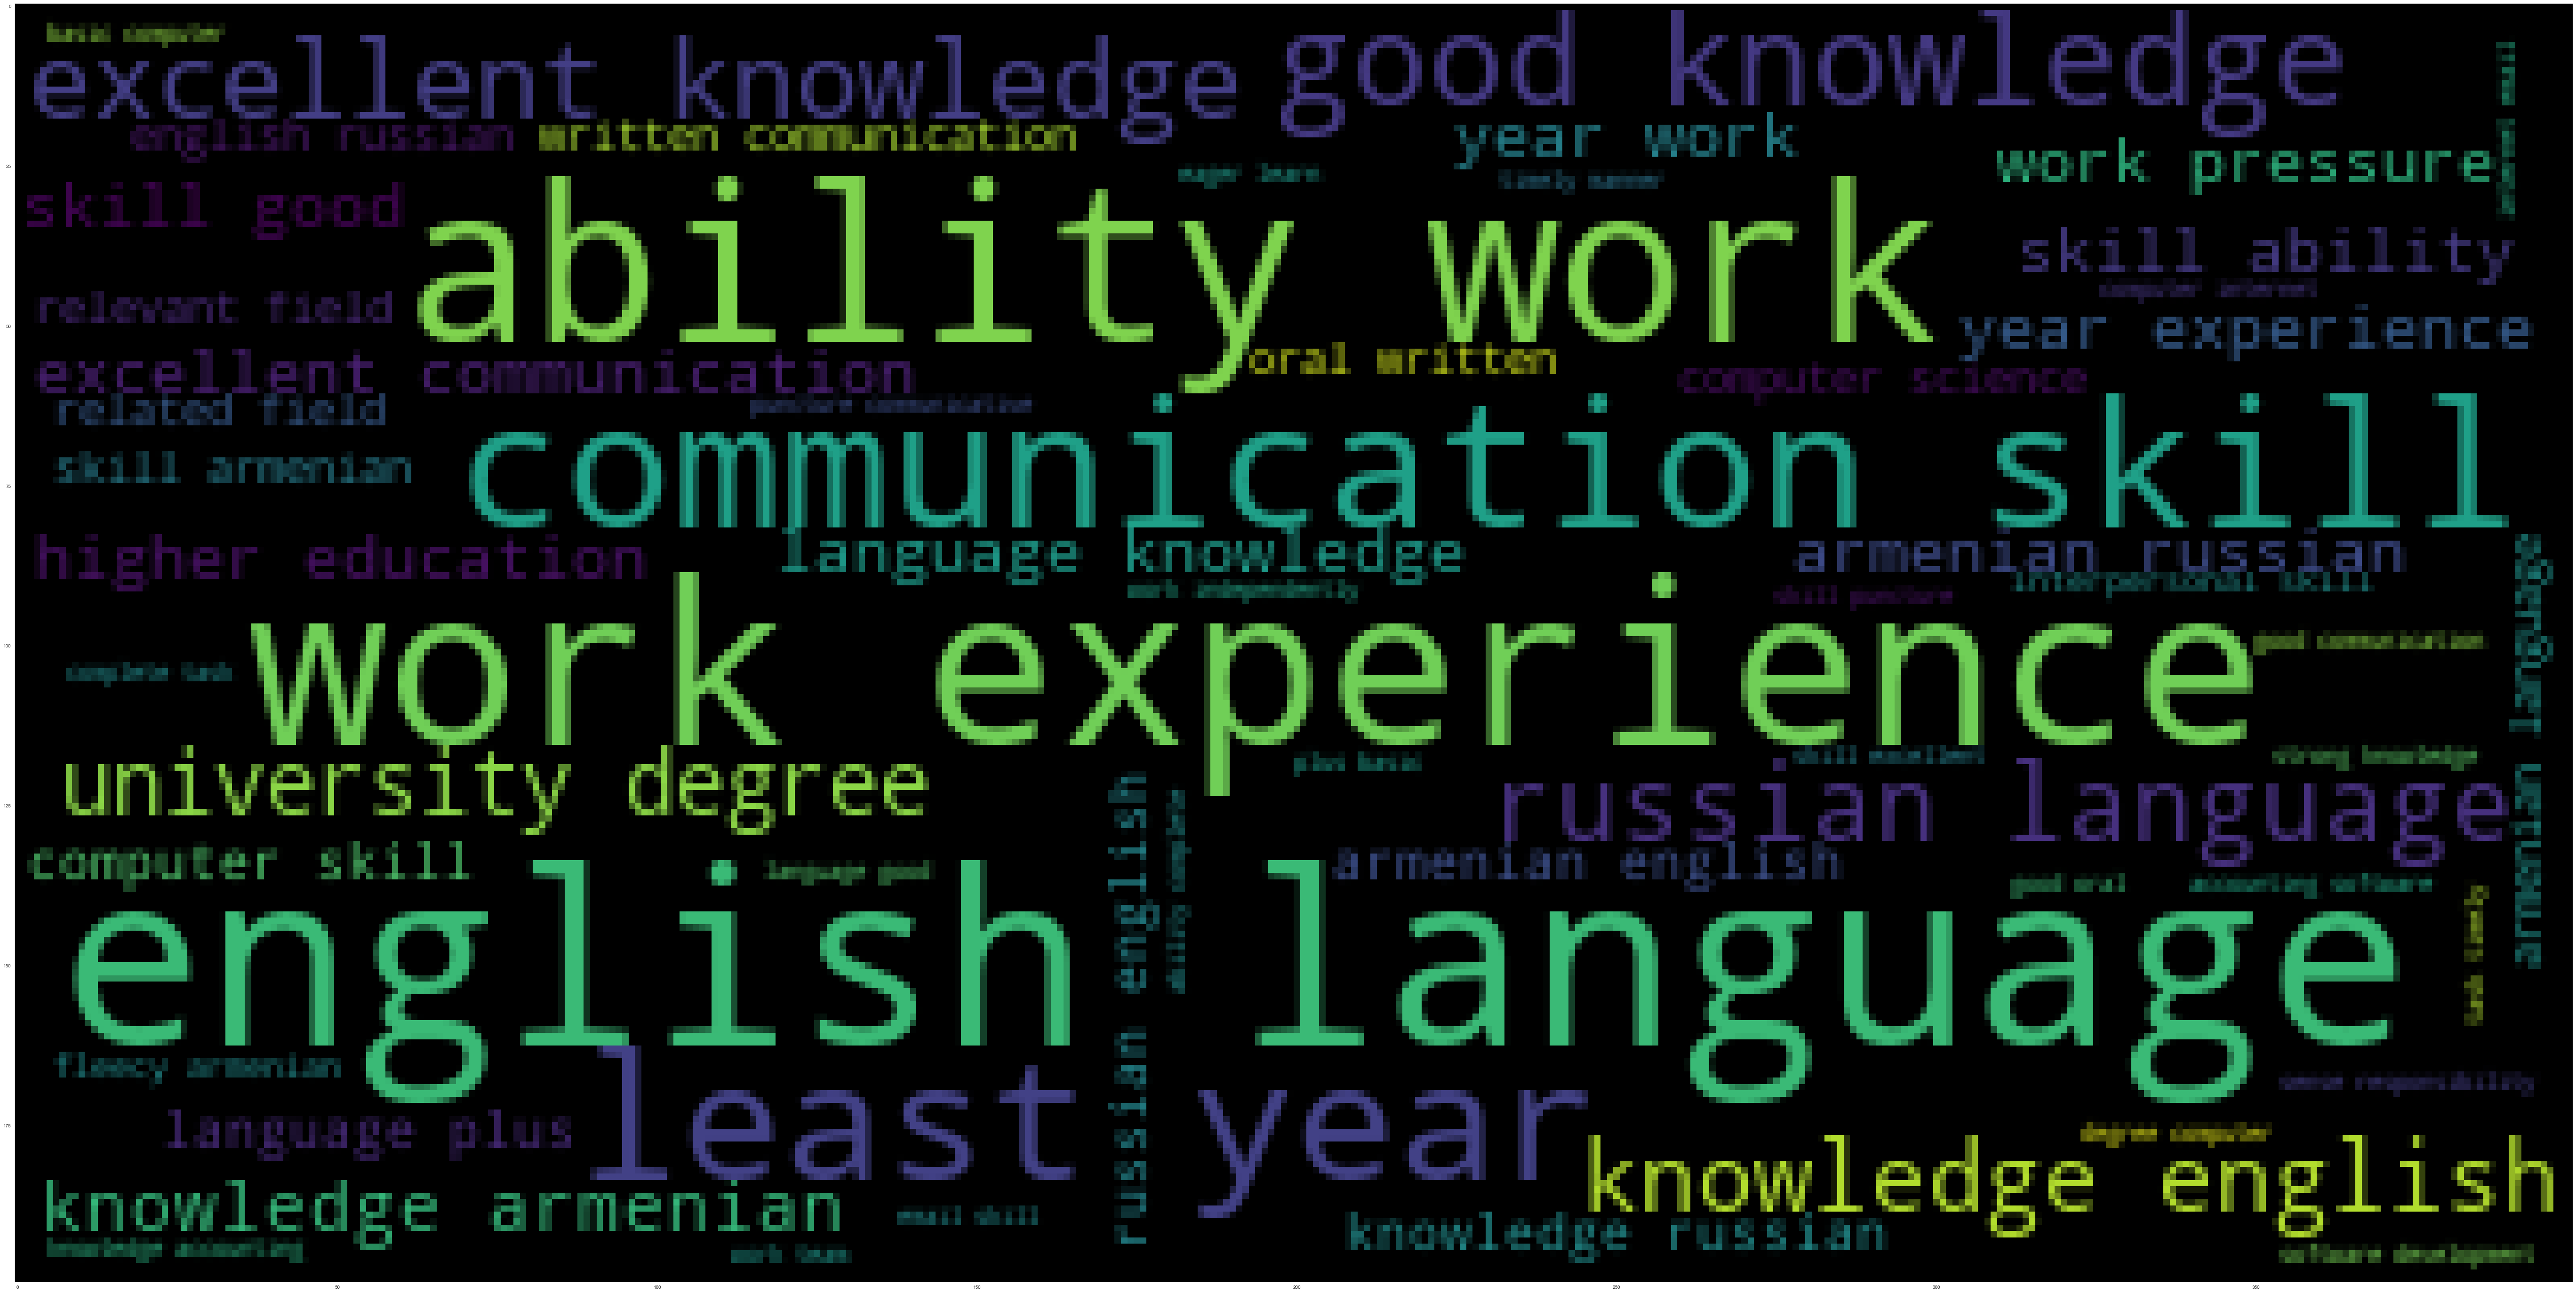

In [154]:
wordcloud = WordCloud(stopwords=[]).generate(' '.join(X_train.tolist()))

%matplotlib inline
fig = plt.figure(figsize=(200,50))
plt.imshow(wordcloud)

### Create user defined function for train the models

In [34]:
def train_model(classifier, feature_vector_train, label, feature_vector_valid,  valid_y, is_neural_net=False):
    # fit the training dataset on the classifier
    classifier.fit(feature_vector_train, label)
    
    # predict the labels on validation dataset
    predictions = classifier.predict(feature_vector_valid)
    
    if is_neural_net:
        predictions = predictions.argmax(axis=-1)
    
    
    return metrics.accuracy_score(predictions, valid_y)

### Building different models with different vectors

In [156]:
#Naive Bayes
# Naive Bayes on Count Vectors and TF-IDF
accuracy_L1 = train_model(naive_bayes.MultinomialNB(), X_train_tfidf, y_train, X_test_tfidf, y_test)
print("NB for L1, Count Vectors: ", accuracy_L1)

# Naive Bayes on Word Level TF IDF Vectors
accuracy_L1 = train_model(naive_bayes.MultinomialNB(), xtrain_count, y_train, xtest_count, y_test)
print("NB  for L1, WordLevel TF-IDF: ", accuracy_L1)

# Naive Bayes on Ngram Level TF IDF Vectors
accuracy_L1 = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf_ngram, y_train, xtest_tfidf_ngram, y_test)
print("NB  for L1, N-Gram Vectors: ", accuracy_L1)



# Naive Bayes on Character Level TF IDF Vectors
accuracy_L1 = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf_ngram_chars, y_train, xtest_tfidf_ngram_chars, y_test)
print("NB for L1, CharLevel Vectors: ", accuracy_L1)

NB for L1, Count Vectors:  0.9660574412532638
NB  for L1, WordLevel TF-IDF:  0.9738903394255874
NB  for L1, N-Gram Vectors:  0.8981723237597912
NB for L1, CharLevel Vectors:  0.9399477806788512


In [157]:
#Logistic Regression
# Logistic Regression on Count Vectors and TF-IDF
accuracy_L1 = train_model(LogisticRegression(), X_train_tfidf, y_train, X_test_tfidf, y_test)
print("LR  for L1, Count Vectors: ", accuracy_L1)



# Logistic Regression on Word Level TF IDF Vectors
accuracy_L1 = train_model(LogisticRegression(), xtrain_count, y_train, xtest_count, y_test)
print("LR  for L1, WordLevel TF-IDF: ", accuracy_L1)



# Logistic Regression on Ngram Level TF IDF Vectors
accuracy_L1 = train_model(LogisticRegression(), xtrain_tfidf_ngram, y_train, xtest_tfidf_ngram, y_test)
print("LR  for L1, N-Gram Vectors: ", accuracy_L1)



# Logistic Regression on Character Level TF IDF Vectors
accuracy_L1 = train_model(LogisticRegression(), xtrain_tfidf_ngram_chars, y_train, xtest_tfidf_ngram_chars, y_test)
print("LR for L1, CharLevel Vectors: ", accuracy_L1)

LR  for L1, Count Vectors:  0.9556135770234987
LR  for L1, WordLevel TF-IDF:  0.9712793733681462
LR  for L1, N-Gram Vectors:  0.9425587467362925
LR for L1, CharLevel Vectors:  0.97911227154047


In [158]:
#Linear SVC
# Linear SVC on Count Vectors and TF-IDF
accuracy_L1 = train_model(svm.LinearSVC(), X_train_tfidf, y_train, X_test_tfidf, y_test)
print("SVC  for L1, Count Vectors: ", accuracy_L1)



# Linear SVC on Word Level TF IDF Vectors
accuracy_L1 = train_model(svm.LinearSVC(), xtrain_count, y_train, xtest_count, y_test)
print("SVC  for L1, WordLevel TF-IDF: ", accuracy_L1)



# Linear SVC on Ngram Level TF IDF Vectors
accuracy_L1 = train_model(svm.LinearSVC(), xtrain_tfidf_ngram, y_train, xtest_tfidf_ngram, y_test)
print("SVC  for L1, N-Gram Vectors: ", accuracy_L1)



# Linear SVC on Character Level TF IDF Vectors
accuracy_L1 = train_model(svm.LinearSVC(), xtrain_tfidf_ngram_chars, y_train, xtest_tfidf_ngram_chars, y_test)
print("SVC for L1, CharLevel Vectors: ", accuracy_L1)

SVC  for L1, Count Vectors:  0.9765013054830287
SVC  for L1, WordLevel TF-IDF:  0.9686684073107049
SVC  for L1, N-Gram Vectors:  0.9608355091383812
SVC for L1, CharLevel Vectors:  0.9869451697127938


In [159]:
#Random Forest
# Random Forest on Count Vectors and TF-IDF
accuracy_L1 = train_model(RandomForestClassifier(), X_train_tfidf, y_train, X_test_tfidf, y_test)
print("LR  for L1, Count Vectors: ", accuracy_L1)



# Random Forest on Word Level TF IDF Vectors
accuracy_L1 = train_model(RandomForestClassifier(), xtrain_count, y_train, xtest_count, y_test)
print("LR  for L1, WordLevel TF-IDF: ", accuracy_L1)



# Random Forest on Ngram Level TF IDF Vectors
accuracy_L1 = train_model(RandomForestClassifier(), xtrain_tfidf_ngram, y_train, xtest_tfidf_ngram, y_test)
print("LR  for L1, N-Gram Vectors: ", accuracy_L1)



# Random Forest on Character Level TF IDF Vectors
accuracy_L1 = train_model(RandomForestClassifier(), xtrain_tfidf_ngram_chars, y_train, xtest_tfidf_ngram_chars, y_test)
print("LR for L1, CharLevel Vectors: ", accuracy_L1)

LR  for L1, Count Vectors:  0.9503916449086162
LR  for L1, WordLevel TF-IDF:  0.9686684073107049
LR  for L1, N-Gram Vectors:  0.9347258485639687
LR for L1, CharLevel Vectors:  0.9634464751958225


In [160]:
#XGBoosting
# XGBoosting on Count Vectors and TF-IDF
accuracy_L1 = train_model(XGBClassifier(), X_train_tfidf, y_train, X_test_tfidf, y_test)
print("LR  for L1, Count Vectors: ", accuracy_L1)



# XGBoosting on Word Level TF IDF Vectors
accuracy_L1 = train_model(XGBClassifier(), xtrain_count, y_train, xtest_count, y_test)
print("LR  for L1, WordLevel TF-IDF: ", accuracy_L1)



# XGBoosting on Ngram Level TF IDF Vectors
accuracy_L1 = train_model(XGBClassifier(), xtrain_tfidf_ngram, y_train, xtest_tfidf_ngram, y_test)
print("LR  for L1, N-Gram Vectors: ", accuracy_L1)



# XGBoosting on Character Level TF IDF Vectors
accuracy_L1 = train_model(XGBClassifier(), xtrain_tfidf_ngram_chars, y_train, xtest_tfidf_ngram_chars, y_test)
print("LR for L1, CharLevel Vectors: ", accuracy_L1)

LR  for L1, Count Vectors:  0.9451697127937336
LR  for L1, WordLevel TF-IDF:  0.9503916449086162
LR  for L1, N-Gram Vectors:  0.9060052219321149
LR for L1, CharLevel Vectors:  0.9712793733681462


In [161]:
#ANN
# ANN on Count Vectors and TF-IDF
accuracy_L1 = train_model(MLPClassifier(), X_train_tfidf, y_train, X_test_tfidf, y_test)
print("LR  for L1, Count Vectors: ", accuracy_L1)



#ANN on Word Level TF IDF Vectors
accuracy_L1 = train_model(MLPClassifier(), xtrain_count, y_train, xtest_count, y_test)
print("LR  for L1, WordLevel TF-IDF: ", accuracy_L1)



# ANN on Ngram Level TF IDF Vectors
accuracy_L1 = train_model(MLPClassifier(), xtrain_tfidf_ngram, y_train, xtest_tfidf_ngram, y_test)
print("LR  for L1, N-Gram Vectors: ", accuracy_L1)



# ANN on Character Level TF IDF Vectors
accuracy_L1 = train_model(MLPClassifier(), xtrain_tfidf_ngram_chars, y_train, xtest_tfidf_ngram_chars, y_test)
print("LR for L1, CharLevel Vectors: ", accuracy_L1)

LR  for L1, Count Vectors:  0.97911227154047
LR  for L1, WordLevel TF-IDF:  0.97911227154047
LR  for L1, N-Gram Vectors:  0.9660574412532638
LR for L1, CharLevel Vectors:  0.9869451697127938


In [162]:
#ANN +logistic
# ANN +logistic on Count Vectors and TF-IDF
accuracy_L1 = train_model(MLPClassifier(activation='logistic'), X_train_tfidf, y_train, X_test_tfidf, y_test)
print("LR  for L1, Count Vectors: ", accuracy_L1)



# ANN +logistic on Word Level TF IDF Vectors
accuracy_L1 = train_model(MLPClassifier(activation='logistic'), xtrain_count, y_train, xtest_count, y_test)
print("LR  for L1, WordLevel TF-IDF: ", accuracy_L1)



# ANN +logistic on Ngram Level TF IDF Vectors
accuracy_L1 = train_model(MLPClassifier(activation='logistic'), xtrain_tfidf_ngram, y_train, xtest_tfidf_ngram, y_test)
print("LR  for L1, N-Gram Vectors: ", accuracy_L1)



# ANN +logistic on Character Level TF IDF Vectors
accuracy_L1 = train_model(MLPClassifier(activation='logistic'), xtrain_tfidf_ngram_chars, y_train, xtest_tfidf_ngram_chars, y_test)
print("LR for L1, CharLevel Vectors: ", accuracy_L1)

LR  for L1, Count Vectors:  0.9738903394255874
LR  for L1, WordLevel TF-IDF:  0.9765013054830287
LR  for L1, N-Gram Vectors:  0.9712793733681462
LR for L1, CharLevel Vectors:  0.9843342036553525


In [163]:
#OneVsRest + XGBoosting
# OneVsRest + XGBoosting on Count Vectors and TF-IDF
accuracy_L1 = train_model(OneVsRestClassifier(XGBClassifier()), X_train_tfidf, y_train, X_test_tfidf, y_test)
print("LR  for L1, Count Vectors: ", accuracy_L1)



# OneVsRest + XGBoosting on Word Level TF IDF Vectors
accuracy_L1 = train_model(OneVsRestClassifier(XGBClassifier()), xtrain_count, y_train, xtest_count, y_test)
print("LR  for L1, WordLevel TF-IDF: ", accuracy_L1)



# OneVsRest + XGBoosting on Ngram Level TF IDF Vectors
accuracy_L1 = train_model(OneVsRestClassifier(XGBClassifier()), xtrain_tfidf_ngram, y_train, xtest_tfidf_ngram, y_test)
print("LR  for L1, N-Gram Vectors: ", accuracy_L1)



# OneVsRest + XGBoosting on Character Level TF IDF Vectors
accuracy_L1 = train_model(OneVsRestClassifier(XGBClassifier()), xtrain_tfidf_ngram_chars, y_train, xtest_tfidf_ngram_chars, y_test)
print("LR for L1, CharLevel Vectors: ", accuracy_L1)

LR  for L1, Count Vectors:  0.9451697127937336
LR  for L1, WordLevel TF-IDF:  0.9503916449086162
LR  for L1, N-Gram Vectors:  0.9060052219321149
LR for L1, CharLevel Vectors:  0.9712793733681462


### Adding Features to a Document-Term Matrix

In [167]:
# create a DataFrame that only contains the IT=1 and IT=0
job_post = df[(df.IT==0)| (df.IT==1)]

# define X and y
feature_cols = ['RequiredQual','sentiment']
X = df[feature_cols]
y = df.IT

# split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=1)

In [168]:
# use CountVectorizer with text column only
vect = TfidfVectorizer(lowercase=True, stop_words='english', max_df=0.9,min_df=0.001, ngram_range=(2,3))
X_train_dtm = vect.fit_transform(X_train.RequiredQual)
X_test_dtm = vect.transform(X_test.RequiredQual)
print(X_train_dtm.shape)
print(X_test_dtm.shape)

# shape of other four feature columns
X_train.drop('RequiredQual', axis=1).shape

(1914, 22023)
(638, 22023)


(1914, 1)

In [169]:
# use CountVectorizer with text column only
vect = CountVectorizer()
X_train_dtm = vect.fit_transform(X_train.RequiredQual)
X_test_dtm = vect.transform(X_test.RequiredQual)
print(X_train_dtm.shape)
print(X_test_dtm.shape)

# shape of other four feature columns
X_train.drop('RequiredQual', axis=1).shape

(1914, 3585)
(638, 3585)


(1914, 1)

In [170]:
# cast other feature columns to float and convert to a sparse matrix
extra = sparse.csr_matrix(X_train.drop('RequiredQual', axis=1).astype(float))
extra.shape

# combine sparse matrices
X_train_dtm_extra = sparse.hstack((X_train_dtm, extra))
X_train_dtm_extra.shape

# repeat for testing set
extra = sparse.csr_matrix(X_test.drop('RequiredQual', axis=1).astype(float))
X_test_dtm_extra = sparse.hstack((X_test_dtm, extra))
X_test_dtm_extra.shape

(638, 3586)

In [189]:
# use ANN with all features
mp = MLPClassifier()
mp.fit(X_train_dtm, y_train)
y_pred_class = mp.predict(X_test_dtm)
acc_mlp=metrics.accuracy_score(y_test, y_pred_class)
acc_mlp

0.9890282131661442

In [190]:
# use ANN with all features
mp = MLPClassifier()
mp.fit(X_train_dtm_extra, y_train)
y_pred_class = mp.predict(X_test_dtm_extra)
acc_mlp1=metrics.accuracy_score(y_test, y_pred_class)
acc_mlp1

0.9890282131661442

In [173]:
# use Random Forest with text column only
rmf = RandomForestClassifier()
rmf.fit(X_train_dtm, y_train)
y_pred_class = rmf.predict(X_test_dtm,)
acc_rmf=metrics.accuracy_score(y_test, y_pred_class)
acc_rmf

0.9686520376175548

In [174]:
# use Random Forest with all features
rmf = RandomForestClassifier()
rmf.fit(X_train_dtm_extra, y_train)
y_pred_class = rmf.predict(X_test_dtm_extra)
acc_rmf1=metrics.accuracy_score(y_test, y_pred_class)
acc_rmf1

0.9702194357366771

In [175]:
# use logistic regression with text column only
logreg = LogisticRegression(C=1e9)
logreg.fit(X_train_dtm, y_train)
y_pred_class = logreg.predict(X_test_dtm)
acc_log=metrics.accuracy_score(y_test, y_pred_class)
acc_log

0.9827586206896551

In [176]:
# use logistic regression with text column only
logreg= LogisticRegression(C=1e9)
logreg.fit(X_train_dtm_extra, y_train)
y_pred_class = logreg.predict(X_test_dtm_extra)
acc_log1=metrics.accuracy_score(y_test, y_pred_class)
acc_log1

0.9827586206896551

In [177]:
# use Xtreme Boosting with text column only
xgb = XGBClassifier()
xgb.fit(X_train_dtm, y_train)
y_pred_class = xgb.predict(X_test_dtm)
acc_xgb=metrics.accuracy_score(y_test, y_pred_class)
acc_xgb

0.9827586206896551

In [178]:
# use Xtreme Boosting with text column only
xgb =XGBClassifier()
xgb.fit(X_train_dtm_extra, y_train)
y_pred_class = xgb.predict(X_test_dtm_extra)
acc_xgb1=metrics.accuracy_score(y_test, y_pred_class)
acc_xgb1

0.9827586206896551

In [179]:
# use ANN and logistic with text column only
mp = MLPClassifier(activation='logistic')
mp.fit(X_train_dtm, y_train)
y_pred_class = mp.predict(X_test_dtm)
acc_mlp_ln=metrics.accuracy_score(y_test, y_pred_class)
acc_mlp_ln

0.9858934169278997

In [180]:
# use ANN and logistic with text column only
mp = MLPClassifier(activation='logistic')
mp.fit(X_train_dtm_extra, y_train)
y_pred_class = mp.predict(X_test_dtm_extra)
acc_mlp_ln1=metrics.accuracy_score(y_test, y_pred_class)
acc_mlp_ln1

0.987460815047022

In [181]:
# use OneVsRest and Boosting with text column only
one_xgb = OneVsRestClassifier(XGBClassifier())
one_xgb.fit(X_train_dtm, y_train)
y_pred_class = one_xgb.predict(X_test_dtm)
acc_one_xgb=metrics.accuracy_score(y_test, y_pred_class)
acc_one_xgb

0.9827586206896551

In [182]:
# use OneVsRest and Boosting with all features
one_xgb = OneVsRestClassifier(XGBClassifier())
one_xgb.fit(X_train_dtm_extra, y_train)
y_pred_class = one_xgb.predict(X_test_dtm_extra)
acc_one_xgb1=metrics.accuracy_score(y_test, y_pred_class)
acc_one_xgb1

0.9827586206896551

In [183]:
# use SVM with text column only
sm =svm.LinearSVC()
sm.fit(X_train_dtm, y_train)
y_pred_class = sm.predict(X_test_dtm)
acc_svm=metrics.accuracy_score(y_test, y_pred_class)
acc_svm

0.9858934169278997

In [184]:
# use SVM with all features
svm1 = svm.LinearSVC()
svm1.fit(X_train_dtm_extra, y_train)
y_pred_class = svm1.predict(X_test_dtm_extra)
acc_svm1=metrics.accuracy_score(y_test, y_pred_class)
acc_svm1

0.9858934169278997

Text(0.5, 16.0, 'Predicted label')

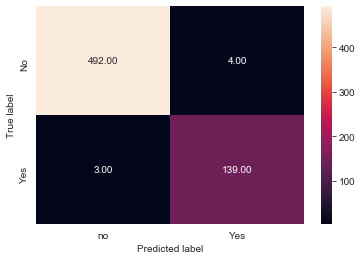

In [191]:
cm = metrics.confusion_matrix( y_test, y_pred_class)
sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["no", "Yes"] , yticklabels = ["No", "Yes"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [192]:
models = pd.DataFrame({
    'Model': ['Logistic Regression','Random Forest', 'XGBoosting','ANN','ANN + logistic','OneVsRest + XGBoosting','sm'],
    
    'Score': [acc_log,acc_rmf,acc_xgb,acc_mlp,acc_mlp_ln,acc_one_xgb,acc_svm]
    })

models.sort_values(by='Score', ascending=False)

,Model,Score
3,ANN,0.989028
4,ANN + logistic,0.985893
6,sm,0.985893
0,Logistic Regression,0.982759
2,XGBoosting,0.982759
5,OneVsRest + XGBoosting,0.982759
1,Random Forest,0.968652


In [193]:
models = pd.DataFrame({
    'Model': ['Logistic Regression','Random Forest', 'XGBoosting','ANN','ANN + logistic','OneVsRest + XGBoosting','svm1'],
    
    'Score': [acc_log1,acc_rmf1,acc_xgb1,acc_mlp1,acc_mlp_ln1,acc_one_xgb1,acc_svm1]
    })

models.sort_values(by='Score', ascending=False)

,Model,Score
3,ANN,0.989028
4,ANN + logistic,0.987461
6,svm1,0.985893
0,Logistic Regression,0.982759
2,XGBoosting,0.982759
5,OneVsRest + XGBoosting,0.982759
1,Random Forest,0.970219


#### We got best accuracy by ANN 

# Unsupervised Learning

In [11]:
# Data Selection
dff = job_post[['RequiredQual']]

In [12]:
dff['RequiredQual'] = dff['RequiredQual'].astype(str)

#### K-Means Clustering

In [13]:
from nltk.util import ngrams

#### Removal of Punctuations and Conversion to Lower-case

In [14]:
def remove_punctuations(text):
    text=re.sub(r'!"#$%&()*,-./:;<=>?@\[]^_`{|}~','', text)                # Remove punctuations
    text=text.lower()                                       # Convert text to lower
    return(text)

dff['RequiredQual']=dff['RequiredQual'].apply( lambda x: remove_punctuations(x))
dff['RequiredQual'].head(4)

0    to perform this job successfully, an\nindividu...
1    - bachelor's degree; master's is preferred;\n-...
2    - degree in environmentally related field, or ...
3    - advanced degree in public health, social sci...
Name: RequiredQual, dtype: object

In [16]:
#tokenize text with Tfidf
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(min_df = 0.1, max_df=0.9,
                             ngram_range=(1, 4), 
                             stop_words='english')
vectorizer.fit(dff['RequiredQual'])

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=0.9, max_features=None,
                min_df=0.1, ngram_range=(1, 4), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words='english', strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [17]:
X_train = vectorizer.transform(dff['RequiredQual'])
vocab = vectorizer.get_feature_names()

In [18]:
vocab[:10]

['ability',
 'ability work',
 'ability work pressure',
 'accounting',
 'advanced',
 'analytical',
 'armenian',
 'armenian english',
 'armenian russian',
 'armenian russian english']

In [19]:
# get the tf-idf table 
vectorizer = TfidfVectorizer(min_df = 0.05, max_df=0.95,
                             ngram_range=(1, 2), 
                             stop_words='english')
vectorizer.fit(dff['RequiredQual'])

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=0.95, max_features=None,
                min_df=0.05, ngram_range=(1, 2), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words='english', strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [20]:
# Create a training data
X_train = vectorizer.transform(dff['RequiredQual'])

In [21]:
# Use SVD to reduce dimensions
svd = TruncatedSVD(200)
normalizer = Normalizer(copy=False)
lsa = make_pipeline(svd, normalizer)
X_lsa = lsa.fit_transform(X_train)

In [22]:
explained_variance = svd.explained_variance_ratio_.sum()
print("Explained variance of the SVD step: {}%".format(int(explained_variance * 100)))

Explained variance of the SVD step: 99%


In [23]:
range_n_clusters = list (range(4,11))

In [26]:
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(X_lsa)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X_lsa, preds, metric='euclidean')
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 4, silhouette score is 0.043491973914576924
For n_clusters = 5, silhouette score is 0.04733629542969017
For n_clusters = 6, silhouette score is 0.049576179765194996
For n_clusters = 7, silhouette score is 0.04955196791559433
For n_clusters = 8, silhouette score is 0.05143588422736518
For n_clusters = 9, silhouette score is 0.051516846121315
For n_clusters = 10, silhouette score is 0.05265391256887889


#####  Best number of clusters are 9 because of highest silhouette score.

In [35]:
# we create a kmeans model
model = KMeans(n_clusters=10, 
               init='k-means++', 
               max_iter=100, n_init=1,random_state=5)

In [36]:
# apply the model on this prepared data
res = model.fit(X_train)
res

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=10, n_init=1, n_jobs=None, precompute_distances='auto',
       random_state=5, tol=0.0001, verbose=0)

In [37]:
# Getting the vocalbulary as well as cluster centers
# Firstly, set of words from the tf-idf itself
vocab = vectorizer.get_feature_names()
vocab = np.array(vocab) 

In [38]:
# Then, the cluster centers from the model fit that we stored on res
cluster_centers = np.array(res.cluster_centers_)

In [39]:
x=np.array((0.1,10,0.05,1.5))
print(x)
print(x.argsort())
res.cluster_centers_[0].argsort()

[ 0.1  10.    0.05  1.5 ]
[2 0 3 1]


array([ 68, 161,  82,  81,  96, 140,  32,  72,  26,  89,  29, 160, 172,
        57,   2,  18,  91, 155, 197, 171, 134, 187, 178, 138, 104, 107,
        86, 179,  92,  53, 103, 181, 170,  98, 162, 131, 168,  47,   6,
        40, 199, 156, 169,  19, 176, 190,  94, 133, 158,  62, 101,  63,
       145,  55, 157, 109, 211, 124,   8, 164, 149,  58, 210,  17,  87,
        28, 114, 150,  10, 102, 118, 141,  15, 163, 215,  20,  59, 188,
       125,  65,  35, 185, 182, 152, 153,  37, 147,  54,   5, 167, 130,
        34, 177,  84,  93,   3,   9, 127,  33, 106, 121, 144, 139, 143,
        76, 136, 175, 112,  66, 174, 216, 173, 212,  50, 108,  71, 122,
       135,  13,  44, 214, 191,  78, 142, 115,  12,  70, 128,  45, 193,
         4,  95,  60,  14,  25,  36, 186,  75, 110, 196,  16,  97, 208,
       154,  77, 117,  67, 201,  73,  21,   7, 105,  85,  99,  42,  80,
        51,  27, 120, 113, 192,  69, 129, 146, 195,  61, 159,  43, 123,
       148, 137, 194, 116, 183,  48, 111, 126,  56, 200, 207,  3

In [40]:
# sorting the cluster centers
sorted_vals = [res.cluster_centers_[i].argsort() for i in range(0,np.shape(res.cluster_centers_)[0])]

In [41]:
# get top 10 words from that cluster
words=set()
for i in range(len(res.cluster_centers_)):
    words = words.union(set(vocab[sorted_vals[i][-10:]]))
    print(words)

{'ability work', 'skills ability', 'excellent', 'experience', 'knowledge', 'skills', 'work', 'team', 'ability', 'pressure'}
{'excellent', 'software', 'skills', 'sql', 'ability work', 'team', 'ability', 'skills ability', 'programming', 'experience', 'development', 'web', 'work', 'design', 'knowledge', 'pressure'}
{'university degree', 'university', 'excellent', 'software', 'skills', 'sql', 'armenian', 'languages', 'ability work', 'team', 'armenian russian', 'ability', 'skills ability', 'programming', 'experience', 'development', 'degree', 'web', 'work', 'design', 'russian', 'knowledge', 'pressure'}
{'knowledge english', 'university degree', 'university', 'english language', 'excellent', 'software', 'skills', 'sql', 'armenian', 'languages', 'ability work', 'team', 'armenian russian', 'good', 'ability', 'english', 'skills ability', 'programming', 'experience', 'development', 'degree', 'web', 'work', 'design', 'russian', 'good knowledge', 'knowledge', 'language', 'pressure'}
{'university d

In [42]:
words=list(words)

In [43]:
#add top words to train set
train_set=X_train[:,[np.argwhere(vocab==i)[0][0] for i in words]]

In [44]:
#train_set[,]
dff.head()

,RequiredQual
0,"to perform this job successfully, an\nindividu..."
1,- bachelor's degree; master's is preferred;\n-...
2,"- degree in environmentally related field, or ..."
3,"- advanced degree in public health, social sci..."
4,- university degree; economical background is ...


In [46]:
# how many observations are in each cluster

dff['cluster'] = model.labels_
dff.groupby('cluster').count()

,RequiredQual
cluster,
0,2273
1,2671
2,2147
3,1921
4,2341
5,572
6,1344
7,2212
8,1353


In [49]:
# what does each cluster look like
dff.head()

,RequiredQual,cluster
0,"to perform this job successfully, an\nindividu...",6
1,- bachelor's degree; master's is preferred;\n-...,0
2,"- degree in environmentally related field, or ...",4
3,"- advanced degree in public health, social sci...",4
4,- university degree; economical background is ...,1


## Information Extraction

### Information Extraction to Obtain Company Profile

In [14]:
job_post['AboutC']=job_post['AboutC'].fillna(job_post['AboutC'].mode().ix[0])

In [15]:
job_post['AboutC'].head()

4     Career Center NGO\nPhone/Fax: +(374 10) 560328...
19    Career Center NGO\nPhone/Fax: +(374 10) 560328...
20    Career Center NGO\nPhone/Fax: +(374 10) 560328...
21    Career Center NGO\nPhone/Fax: +(374 10) 560328...
29    Career Center NGO\nPhone/Fax: +(374 10) 560328...
Name: AboutC, dtype: object

In [18]:
nlp = spacy.load('en_core_web_sm')
matcher = Matcher(nlp.vocab)

In [19]:
def collect_sents(matcher, doc, i, matches):
    match_id, start, end = matches[i]
    span = doc[start : end]  # matched span
    sent = span.sent  # sentence containing matched span
    match_ents = [{'start': span.start_char - sent.start_char,
                   'end': span.end_char - sent.start_char,
                   'label': 'MATCH'}]
    matched_sents.append({'text': sent.text, 'ents': match_ents })

In [21]:
patn1 = [{'POS':'ADJ'},{'ORTH': '-'}, {'POS':'NOUN', 'OP':'+'}, {'LOWER': 'organization'}]
patn2 = [{'POS':'NOUN', 'OP':'+'}, {'LOWER': 'organization'}]
patn3 = [{'POS':'NOUN', 'OP':'+'}, {'LOWER': 'company'}]
patn4 = [{'POS':'NOUN', 'OP':'+'}, {'LOWER': 'services'}]
patn5 = [{'LOWER': 'company'}, {'POS':'VERB'}, {'POS':'NOUN', 'OP':'+'}]
patn6 = [{'LOWER':'provider'}, {'POS':'ADP'}, {'POS':'NOUN',  'OP': '+'}  , {'POS':'CCONJ','OP':'+'}, {'POS':'NOUN','OP':'+'}]
patn7 = [{'LOWER':'provider'}, {'POS':'ADP'}, {'POS':'NOUN',  'OP': '+'}]
patn8 = [{'POS':'VERB'}, {'POS':'NOUN',  'OP': '+'} ]
patn9 = [{'POS':'ADJ'}, {'POS':'NOUN',  'OP': '+'} ]
patn10 = [{'POS':'NOUN'}, {'POS':'ADP'}, {'POS':'NOUN',  'OP': '+'} ]
patn11 = [{'POS':'NOUN'}, {'POS':'NOUN','OP':'+'} ]

In [22]:
matcher.add('all', collect_sents, patn1, patn2, patn3, patn4, patn5, patn6, patn7, patn8, patn9, patn10, patn11)

In [24]:
matched_sents=[]
for t in job_post.AboutC:
    if pd.notnull(t) and t != 'NaN':
        t = re.sub(r'\s+', ' ', t)
        doc = nlp(t)
        matches = matcher(doc)
        token_set = []
        for match_id, start, end in matches:
            string_id = nlp.vocab.strings[match_id]  # get string representation
            span = doc[start:end]  # the matched span
            token_set.append(span.text)    
        matched_sents.append(token_set)

In [25]:
flat_list = []
for row in matched_sents:
    for token in row:
        flat_list.append(token)

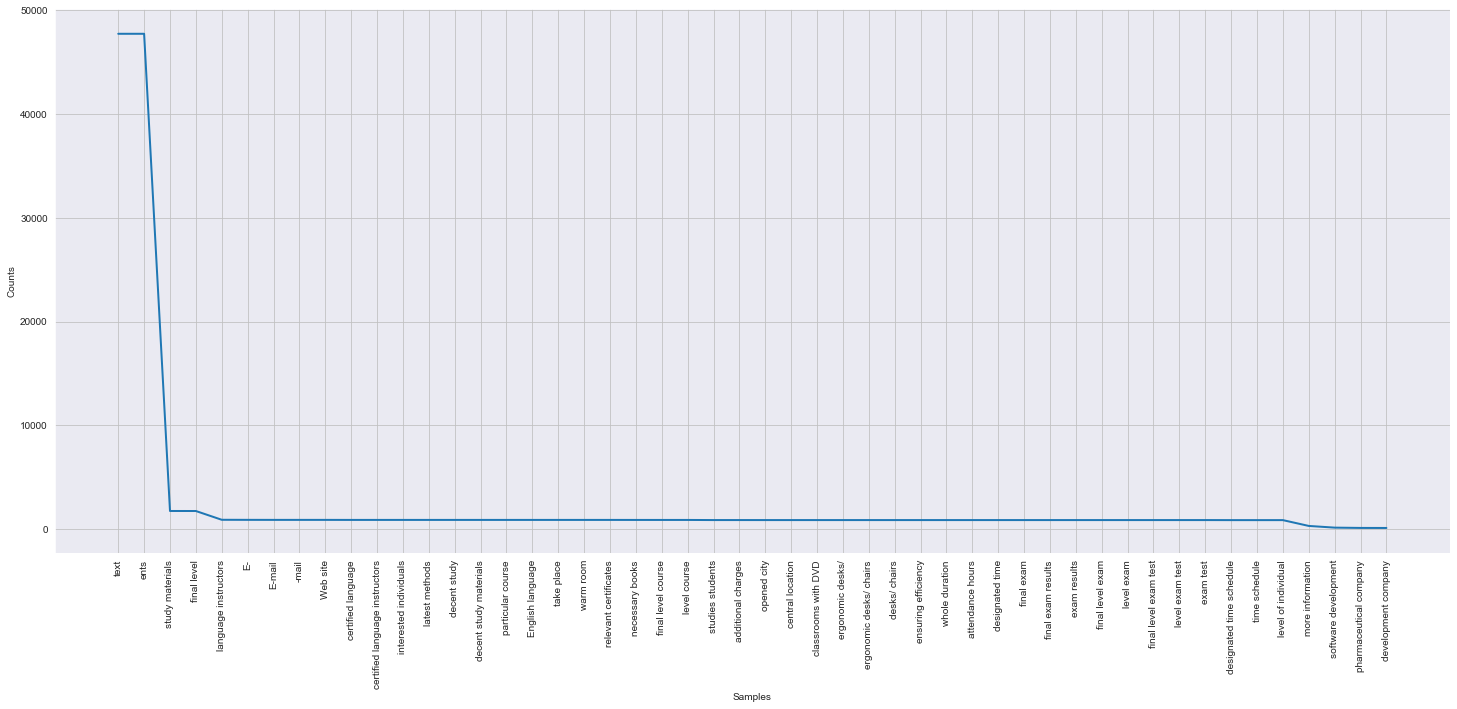

In [31]:
plt.figure(figsize=(25, 10))
fd = nltk.FreqDist(flat_list)  # case sensitive!
fd.most_common(50)
fd.plot(50)
plt.show()

## Job Similarity

In [51]:
df1=job_post[['jobpost','Title','JobRequirment','JobDescription','RequiredQual']]

### Using TF-IDF

In [52]:
df1['JobDescription_token'] = df1['JobDescription'].map(word_tokenize)
df1['RequiredQual_token'] = df1['RequiredQual'].map(word_tokenize)
df1['JobRequirment_token'] = df1['JobRequirment'].map(word_tokenize)

In [53]:
tfidf_model = TfidfVectorizer()
Title_tfidf = tfidf_model.fit_transform(df1['Title'])
JobDescription_tfidf = tfidf_model.fit_transform(df1['JobDescription'])
RequiredQual_tfidf = tfidf_model.fit_transform(df1['RequiredQual'])
JobRequirment_tfidf = tfidf_model.fit_transform(df1['JobRequirment'])

In [54]:
def find_similar_jobs_tfidf(index, top_n = 5):
    Title_tfidf_cosine = cosine_similarity(Title_tfidf[index:index+1], Title_tfidf).flatten()
    JobDescription_tfidf_cosine = cosine_similarity(JobDescription_tfidf[index:index+1], JobDescription_tfidf).flatten()
    RequiredQual_tfidf_cosine = cosine_similarity(RequiredQual_tfidf[index:index+1], RequiredQual_tfidf).flatten()
    JobRequirment_tfidf_cosine = cosine_similarity(JobRequirment_tfidf[index:index+1], JobRequirment_tfidf).flatten()

    average_cosine = (Title_tfidf_cosine +JobDescription_tfidf_cosine+RequiredQual_tfidf_cosine+JobRequirment_tfidf_cosine)/4.0
    related_docs_indices = [i for i in average_cosine.argsort()[::-1] if i != index]
    return [(index, average_cosine[index]) for index in related_docs_indices][0:top_n]

### Chief Financial Officer Jobs

In [55]:
df1.iloc[0]

jobpost                 AMERIA Investment Consulting Company\nJOB TITL...
Title                                             Chief Financial Officer
JobRequirment           - Supervises financial management and administ...
JobDescription          AMERIA Investment Consulting Company is seekin...
RequiredQual            To perform this job successfully, an\nindividu...
JobDescription_token    [AMERIA, Investment, Consulting, Company, is, ...
RequiredQual_token      [To, perform, this, job, successfully, ,, an, ...
JobRequirment_token     [-, Supervises, financial, management, and, ad...
Name: 0, dtype: object

In [56]:
for index, score in find_similar_jobs_tfidf(0):
    print(df1.iloc[index])
    print("SIMILARITY SCORE: ", score)

jobpost                 Organization for Implementation of North-South...
Title                                             Chief Financial Officer
JobRequirment           Financial management of the NSRCIP T1 & T2 pro...
JobDescription          The Chief Financial Officer (CFO) will support...
RequiredQual            - Degree in Accounting, Finance, Business, Law...
JobDescription_token    [The, Chief, Financial, Officer, (, CFO, ), wi...
RequiredQual_token      [-, Degree, in, Accounting, ,, Finance, ,, Bus...
JobRequirment_token     [Financial, management, of, the, NSRCIP, T1, &...
Name: 12368, dtype: object
SIMILARITY SCORE:  0.49834474358571085
jobpost                 River Island\nTITLE:  Chief Financial Officer\...
Title                                             Chief Financial Officer
JobRequirment           - Develop tools and systems to provide critica...
JobDescription          River Island is seeking a Chief Financial Offi...
RequiredQual            - Master's degree in M

###  International Research & Exchanges Board Jobs

In [57]:
df1.iloc[1]

jobpost                 International Research & Exchanges Board (IREX...
Title                   Full-time Community Connections Intern (paid i...
JobRequirment           - Participate in application design;\n- Provid...
JobDescription          The incumbent will work under the direct super...
RequiredQual            - Bachelor's Degree; Master's is preferred;\n-...
JobDescription_token    [The, incumbent, will, work, under, the, direc...
RequiredQual_token      [-, Bachelor, 's, Degree, ;, Master, 's, is, p...
JobRequirment_token     [-, Participate, in, application, design, ;, -...
Name: 1, dtype: object

In [58]:
for index, score in find_similar_jobs_tfidf(1):
    print(df1.iloc[index])
    print("SIMILARITY SCORE: ", score)

jobpost                 International Research & Exchanges Board (IREX...
Title                    Non-paid part or full time Administrative Intern
JobRequirment           - Participate in application design;\n- Provid...
JobDescription          The incumbent will work under the direct super...
RequiredQual            - Excellent communication skills;\n- Good oral...
JobDescription_token    [The, incumbent, will, work, under, the, direc...
RequiredQual_token      [-, Excellent, communication, skills, ;, -, Go...
JobRequirment_token     [-, Participate, in, application, design, ;, -...
Name: 11, dtype: object
SIMILARITY SCORE:  0.6798353526927007
jobpost                 International Research & Exchanges Board (IREX...
Title                      Non-paid part or full time Programmatic Intern
JobRequirment           - Participate in application design;\n- Provid...
JobDescription          The incumbent will work under the direct super...
RequiredQual            - Excellent communication 

#### Caucasus Environmental NGO Network job

In [16]:
df1.iloc[2]

jobpost                 Caucasus Environmental NGO Network (CENN)\nJOB...
Title                                                 Country Coordinator
JobRequirment           - Working with the Country Director to provide...
JobDescription          Public outreach and strengthening of a growing...
RequiredQual            - Degree in environmentally related field, or ...
JobDescription_token    [Public, outreach, and, strengthening, of, a, ...
RequiredQual_token      [-, Degree, in, environmentally, related, fiel...
JobRequirment_token     [-, Working, with, the, Country, Director, to,...
Name: 2, dtype: object

In [17]:
for index, score in find_similar_jobs_tfidf(2):
    print(df1.iloc[index])
    print("SIMILARITY SCORE: ", score)

jobpost                 Caucasus Environmental NGO Network\nTITLE:  Co...
Title                                       Country Coordinator - Armenia
JobRequirment           -  Write first hand articles, conduct intervie...
JobDescription          CENN - Caucasus Environmental NGO Network - is...
RequiredQual            1. Education: University education in environm...
JobDescription_token    [CENN, -, Caucasus, Environmental, NGO, Networ...
RequiredQual_token      [1, ., Education, :, University, education, in...
JobRequirment_token     [-, Write, first, hand, articles, ,, conduct, ...
Name: 404, dtype: object
SIMILARITY SCORE:  0.43463797719195596
jobpost                 Veya  Ltd.\n\n\nTITLE:  Country Coordinator\n\...
Title                                                 Country Coordinator
JobRequirment           - Negotiate with potential customers;\n- Lobby...
JobDescription          Veya Ltd. is looking for a qualified Country\n...
RequiredQual            - At least 5 years of ex

### Using Pretrained Word2Vec Embedding 

In [13]:
nlp = spacy.load('en_core_web_lg')

In [38]:
# Original text - Title
doc1 = nlp(df1.iloc[0]['Title'])
doc2 = nlp(df1.iloc[2]['Title'])
similarity = doc1.similarity(doc2)
print("DOC1:\n" + doc1.text, "\n\nDOC2:\n", doc2.text, "\n\n", similarity)

DOC1:
Chief Financial Officer 

DOC2:
 Country Coordinator 

 0.5373299805896293


In [39]:
# Original text - RequiredQual
doc1 = nlp(df1.iloc[0]['RequiredQual'])
doc2 = nlp(df1.iloc[2]['RequiredQual'])
similarity = doc1.similarity(doc2)
print("DOC1:\n" + doc1.text, "\n\nDOC2:\n", doc2.text, "\n\n", similarity)

DOC1:
To perform this job successfully, an
individual must be able to perform each essential duty satisfactorily.
The requirements listed below are representative of the knowledge,
skill, and/or ability required.
Knowledge of:
- Generally accepted accounting principles;
- Local accounting standards and legislation;
- State reporting requirements pertaining to accounting;
- Principles and practices of financial management and budgeting;
- Principles and practices of financial systems design and analysis;
- Principles and practices of contract management, records management,
and risk management;
- Principles and practices of management and supervision;
- Principles and practices of information systems management.
Ability to:
- Apply sound fiscal and administrative practices to the company's
activities;
- Plan, organize and supervise the work of subordinate employees,
including training them, assigning and evaluating their work, and
providing job performance feedback;
- Critically analyze

In [21]:
# removing stopwords and punctuations
doc1 = nlp(' '.join(df1.iloc[0]['RequiredQual_token']))
doc2 = nlp(' '.join(df1.iloc[2]['RequiredQual_token']))
similarity = doc1.similarity(doc2)
print("DOC1:\n" + doc1.text, "\n\nDOC2:\n", doc2.text, "\n\n", similarity)

DOC1:
To perform this job successfully , an individual must be able to perform each essential duty satisfactorily . The requirements listed below are representative of the knowledge , skill , and/or ability required . Knowledge of : - Generally accepted accounting principles ; - Local accounting standards and legislation ; - State reporting requirements pertaining to accounting ; - Principles and practices of financial management and budgeting ; - Principles and practices of financial systems design and analysis ; - Principles and practices of contract management , records management , and risk management ; - Principles and practices of management and supervision ; - Principles and practices of information systems management . Ability to : - Apply sound fiscal and administrative practices to the company's activities ; - Plan , organize and supervise the work of subordinate employees , including training them , assigning and evaluating their work , and providing job performance feedback

#### POS + RegexMatcher

In [22]:
matcher = Matcher(nlp.vocab)

In [23]:
def collect_sents(matcher, doc, i, matches):
    match_id, start, end = matches[i]
    span = doc[start : end]  # matched span
    sent = span.sent  # sentence containing matched span
    match_ents = [{'start': span.start_char - sent.start_char,
                   'end': span.end_char - sent.start_char,
                   'label': 'MATCH'}]
    matched_sents.append({'text': sent.text, 'ents': match_ents })

In [24]:
patn1 = [{'POS':'ADJ'},{'ORTH': '-'}, {'POS':'NOUN', 'OP':'+'}, {'LOWER': 'organization'}]
patn2 = [{'POS':'NOUN', 'OP':'+'}, {'LOWER': 'organization'}]
patn3 = [{'POS':'NOUN', 'OP':'+'}, {'LOWER': 'company'}]
patn4 = [{'POS':'NOUN', 'OP':'+'}, {'LOWER': 'services'}]
patn5 = [{'LOWER': 'company'}, {'POS':'VERB'}, {'POS':'NOUN', 'OP':'+'}]
patn6 = [{'LOWER':'provider'}, {'POS':'ADP'}, {'POS':'NOUN',  'OP': '+'}  , {'POS':'CCONJ','OP':'+'}, {'POS':'NOUN','OP':'+'}]
patn7 = [{'LOWER':'provider'}, {'POS':'ADP'}, {'POS':'NOUN',  'OP': '+'}]
patn8 = [{'POS':'VERB'}, {'POS':'NOUN',  'OP': '+'} ]
patn9 = [{'POS':'ADJ'}, {'POS':'NOUN',  'OP': '+'} ]
patn10 = [{'POS':'NOUN'}, {'POS':'ADP'}, {'POS':'NOUN',  'OP': '+'} ]
patn11 = [{'POS':'NOUN'}, {'POS':'NOUN','OP':'+'} ]

In [25]:
matcher.add('all', collect_sents, patn1, patn2, patn3, patn4, patn5, patn6, patn7, patn8, patn9, patn10, patn11)

In [27]:
# RequiredQual
for job1_idx in range(df1.shape[0]):
    matched_sents = []
    keywords = []
    t = re.sub(r'\s+', ' ', df1.iloc[job1_idx]['RequiredQual'])
    doc = nlp(t)
    matches = matcher(doc)
    for match_id, start, end in matches:
        string_id = nlp.vocab.strings[match_id]  # get string representation
        span = doc[start:end]  # the matched span
        keywords.append(span.text)
    df1.set_value(job1_idx, 'RequiredQual_keywords', " ".join(keywords))

In [28]:
# JobDescription
for job1_idx in range(df1.shape[0]):
    matched_sents = []
    keywords = []
    t = re.sub(r'\s+', ' ', str(df1.iloc[job1_idx]['JobDescription']))
    doc = nlp(t)
    matches = matcher(doc)
    for match_id, start, end in matches:
        string_id = nlp.vocab.strings[match_id]  # get string representation
        span = doc[start:end]  # the matched span
        keywords.append(span.text)
    df1.set_value(job1_idx, 'JobDescription_keywords', " ".join(keywords))

In [29]:
# JobRequirment
for job1_idx in range(df1.shape[0]):
    matched_sents = []
    keywords = []
    t = re.sub(r'\s+', ' ', str(df1.iloc[job1_idx]['JobRequirment']))
    doc = nlp(t)
    matches = matcher(doc)
    for match_id, start, end in matches:
        string_id = nlp.vocab.strings[match_id]  # get string representation
        span = doc[start:end]  # the matched span
        keywords.append(span.text)
    df1.set_value(job1_idx, 'JobRequirment_keywords', " ".join(keywords))

In [30]:
df1.head(10)

,jobpost,Title,JobRequirment,JobDescription,RequiredQual,JobDescription_token,RequiredQual_token,JobRequirment_token,RequiredQual_keywords,JobDescription_keywords,JobRequirment_keywords
0,AMERIA Investment Consulting Company\nJOB TITL...,Chief Financial Officer,- Supervises financial management and administ...,AMERIA Investment Consulting Company is seekin...,"To perform this job successfully, an\nindividu...","[AMERIA, Investment, Consulting, Company, is, ...","[To, perform, this, job, successfully, ,, an, ...","[-, Supervises, financial, management, and, ad...",essential duty accepted accounting accepted ac...,administrative functions complex staff complex...,financial management administrative staff assi...
1,International Research & Exchanges Board (IREX...,Full-time Community Connections Intern (paid i...,nan,nan,- Bachelor's Degree; Master's is preferred;\n-...,[nan],"[-, Bachelor, 's, Degree, ;, Master, 's, is, p...",[nan],Excellent skills Armenian languages Armenian t...,,
2,Caucasus Environmental NGO Network (CENN)\nJOB...,Country Coordinator,- Working with the Country Director to provide...,Public outreach and strengthening of a growing...,"- Degree in environmentally related field, or ...","[Public, outreach, and, strengthening, of, a, ...","[-, Degree, in, environmentally, related, fiel...","[-, Working, with, the, Country, Director, to,...",related field relevant experience written flue...,Public outreach growing network international ...,environmental information general public elect...
3,Manoff Group\nJOB TITLE: BCC Specialist\nPOSI...,BCC Specialist,- Identify gaps in knowledge and overseeing in...,The LEAD (Local Enhancement and Development fo...,"- Advanced degree in public health, social sci...","[The, LEAD, (, Local, Enhancement, and, Develo...","[-, Advanced, degree, in, public, health, ,, s...","[-, Identify, gaps, in, knowledge, and, overse...",Advanced degree public health social science r...,apply state art approaches address provider ca...,Identify gaps gaps in knowledge overseeing inf...
4,Yerevan Brandy Company\nJOB TITLE: Software D...,Software Developer,- Rendering technical assistance to Database M...,nan,- University degree; economical background is ...,[nan],"[-, University, degree, ;, economical, backgro...","[-, Rendering, technical, assistance, to, Data...",University degree economical background Excell...,,technical assistance servers maintenance serve...
5,"Boutique ""Appollo""\nJOB TITLE: Saleswoman\nPO...",Saleswoman,nan,Saleswoman will sell menswear and accessories.,"- Candidates should be female, 20-30 years old...","[Saleswoman, will, sell, menswear, and, access...","[-, Candidates, should, be, female, ,, 20-30, ...",[nan],looking exterior Excellent communication Excel...,sell menswear,
6,OSI Assistance Foundation - Armenian Branch Of...,Chief Accountant/ Finance Assistant,nan,The Armenian Branch Office of the Open Society...,- University degree in finance/ accounting; \n...,"[The, Armenian, Branch, Office, of, the, Open,...","[-, University, degree, in, finance/, accounti...",[nan],University degree year minimum year minimum ex...,seeking applications grant payments administra...,
7,International Research & Exchanges Board (IREX...,Non-paid part or full time Programmatic Intern,nan,nan,nan,[nan],[nan],[nan],,,
8,Yerevan Brandy Company \nJOB TITLE: Assistant...,Assistant to Managing Director,- Coordinating the work of subordinate employe...,nan,- University degree;\n- At least 3 years of ex...,[nan],"[-, University, degree, ;, -, At, least, 3, ye...","[-, Coordinating, the, work, of, subordinate, ...",University degree years of experience relevant...,,subordinate employees Maintaining liaison othe...
9,American Embassy Yerevan\nANNOUNCEMENT NUMBER:...,"Program Assistant (INL), FSN-8; FP-6*",nan,The incumbent assists in coordinating INL-fund...,NOTE: All applicants are instructed to\naddres...,"[The, incumbent, assists, in, coordinating, IN...","[NOTE, :, All, applicants, are, instruct

In [31]:
job_dissimilarity_df = pd.DataFrame(columns=['index', 'similar-job', 'dissimilar-score'])

In [32]:
for job1_idx in range(3):  # rows
    for job2_idx in range(1000):

        doc1 = nlp(df1.iloc[job1_idx]['Title'])
        doc2 = nlp(df1.iloc[job2_idx]['Title'])
        title_similarity = doc1.similarity(doc2)
        
        doc1 = nlp(df1.iloc[job1_idx]['JobDescription_keywords'])
        doc2 = nlp(df1.iloc[job2_idx]['JobDescription_keywords'])
        jd_similarity = doc1.similarity(doc2)
        
        doc1 = nlp(df1.iloc[job1_idx]['JobRequirment_keywords'])
        doc2 = nlp(df1.iloc[job2_idx]['JobRequirment_keywords'])
        jr_similarity = doc1.similarity(doc2)
        
        doc1 = nlp(df1.iloc[job1_idx]['RequiredQual_keywords'])
        doc2 = nlp(df1.iloc[job2_idx]['RequiredQual_keywords'])
        rq_similarity = doc1.similarity(doc2)
        
        averaged_score = (title_similarity + jd_similarity + jr_similarity + rq_similarity) / 4.0
        job_dissimilarity_df = job_dissimilarity_df.append({'index': job1_idx, 'similar-job': job2_idx, 'dissimilar-score': (1-averaged_score)},ignore_index=True)

In [33]:
# Top similar jobs
job_dissimilarity_df_sorted = job_dissimilarity_df.sort_values(by=['index', 'dissimilar-score'], ascending=[True, True])
job_dissimilarity_df_sorted.head(10)

,index,similar-job,dissimilar-score
0,0.0,0.0,0.000000
697,0.0,697.0,0.069082
926,0.0,926.0,0.111218
126,0.0,126.0,0.124174
778,0.0,778.0,0.132108
234,0.0,234.0,0.136706
683,0.0,683.0,0.137541
112,0.0,112.0,0.139279
176,0.0,176.0,0.143326
180,0.0,180.0,0.143326


In [35]:
# Show top 5 similar results to job - Ameria Investment Consulting Job
similar_jobs = job_dissimilarity_df_sorted.loc[job_dissimilarity_df_sorted['index'] == 0].head(6)['similar-job'].tolist()

for job in similar_jobs:
    print(df1.iloc[int(job)].replace(r'\n',' ', regex=True))

jobpost                    AMERIA Investment Consulting Company JOB TITLE...
Title                                                Chief Financial Officer
JobRequirment              - Supervises financial management and administ...
JobDescription             AMERIA Investment Consulting Company is seekin...
RequiredQual               To perform this job successfully, an individua...
JobDescription_token       [AMERIA, Investment, Consulting, Company, is, ...
RequiredQual_token         [To, perform, this, job, successfully, ,, an, ...
JobRequirment_token        [-, Supervises, financial, management, and, ad...
RequiredQual_keywords      essential duty accepted accounting accepted ac...
JobDescription_keywords    administrative functions complex staff complex...
JobRequirment_keywords     financial management administrative staff assi...
Name: 0, dtype: object
jobpost                    Cascade Capital Holdings CJSC TITLE:  Chief Fi...
Title                                                

In [36]:
# Show top 5 similar results to job - International Research & Exchange Board
similar_jobs = job_dissimilarity_df_sorted.loc[job_dissimilarity_df_sorted['index'] == 1].head(6)['similar-job'].tolist()

for job in similar_jobs:
    print(df1.iloc[int(job)])

jobpost                    International Research & Exchanges Board (IREX...
Title                      Full-time Community Connections Intern (paid i...
JobRequirment                                                            nan
JobDescription                                                           nan
RequiredQual               - Bachelor's Degree; Master's is preferred;\n-...
JobDescription_token                                                   [nan]
RequiredQual_token         [-, Bachelor, 's, Degree, ;, Master, 's, is, p...
JobRequirment_token                                                    [nan]
RequiredQual_keywords      Excellent skills Armenian languages Armenian t...
JobDescription_keywords                                                     
JobRequirment_keywords                                                      
Name: 1, dtype: object
jobpost                    Military Institute MoD RA\nJOB TITLE:   IT Tea...
Title                                                

In [37]:
# Show top 5 similar results to job - Caucasus Environmental NGO Network
similar_jobs = job_dissimilarity_df_sorted.loc[job_dissimilarity_df_sorted['index'] == 2].head(6)['similar-job'].tolist()

for job in similar_jobs:
    print(df1.iloc[int(job)])

jobpost                    Caucasus Environmental NGO Network (CENN)\nJOB...
Title                                                    Country Coordinator
JobRequirment              - Working with the Country Director to provide...
JobDescription             Public outreach and strengthening of a growing...
RequiredQual               - Degree in environmentally related field, or ...
JobDescription_token       [Public, outreach, and, strengthening, of, a, ...
RequiredQual_token         [-, Degree, in, environmentally, related, fiel...
JobRequirment_token        [-, Working, with, the, Country, Director, to,...
RequiredQual_keywords      related field relevant experience written flue...
JobDescription_keywords    Public outreach growing network international ...
JobRequirment_keywords     environmental information general public elect...
Name: 2, dtype: object
jobpost                    International Medical Corps\nJOB TITLE:   Coun...
Title                                                